In [1]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import glob
%matplotlib inline

In [2]:
files = np.sort(glob.glob('./NWS_curated/*.txt'))
df_list = []
for file_name in files:
    df = pd.read_table(file_name,  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])
    df_list.append(df)

In [3]:
len(files)

106

In [4]:
cmap = plt.get_cmap('rainbow')
norm = mcolors.Normalize(vmin=0, vmax=(len(files))-1)

timestep=np.arange(0,len(files),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

Text(0, 0.5, 'Depth Below Sea Floor (m)')

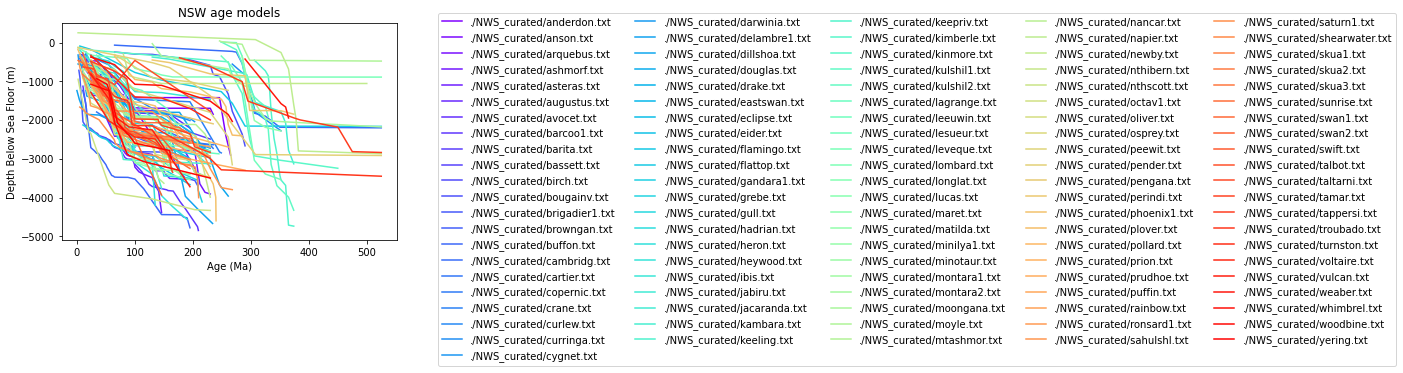

In [5]:
for i in np.arange(0,len(df_list),1):
    plt.plot(df_list[i]['bottom_age'], df_list[i]['bottom_depth']*-1, label=files[i], c=c[i])
plt.legend(loc='lower right',bbox_to_anchor=(4, -0.6), ncol=5)
plt.title('NSW age models')
plt.xlabel('Age (Ma)')
plt.ylabel('Depth Below Sea Floor (m)')

Text(0, 0.5, 'maximum Hole Penetration Depth Below Sea Floor (m)')

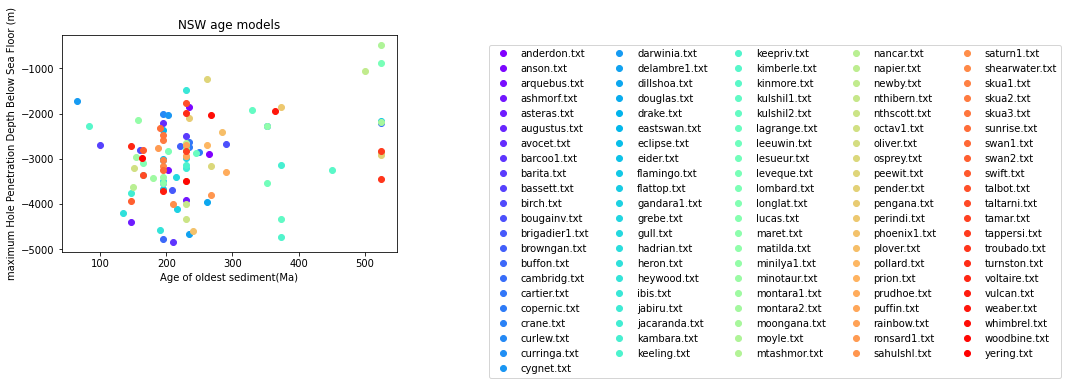

In [6]:
files=np.sort(os.listdir('./NWS_curated'))

for i in np.arange(0,len(df_list),1):
    plt.plot(np.max(df_list[i]['bottom_age']), np.max(df_list[i]['bottom_depth'])*-1,'o', label=files[i+1], c=c[i])
plt.legend(loc='lower right',bbox_to_anchor=(3, -0.6), ncol=5)
plt.title('NSW age models')
plt.xlabel('Age of oldest sediment(Ma)')
plt.ylabel('maximum Hole Penetration Depth Below Sea Floor (m)')


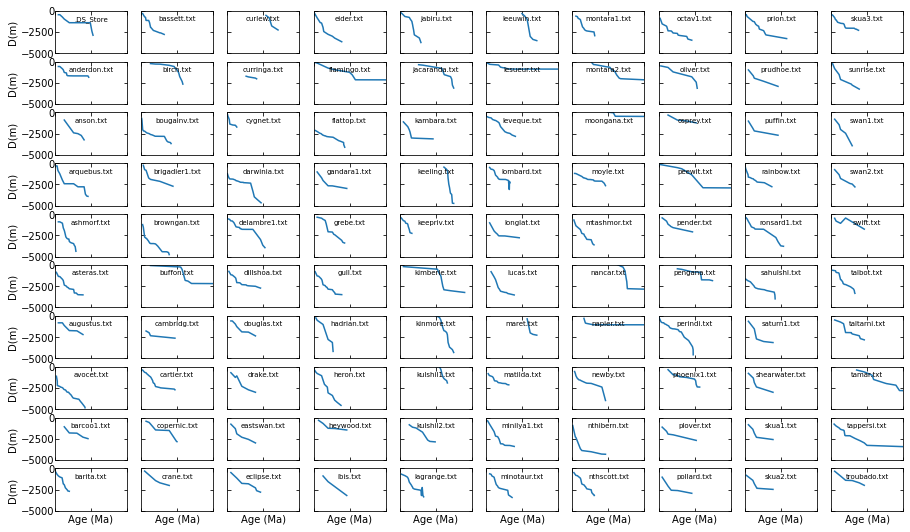

In [7]:
nrows=10
ncols=10
fs=7
files=np.sort(os.listdir('./NWS_curated'))

fig, axs = plt.subplots(nrows,ncols, figsize=(38/2.5, 23/2.5), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.2, wspace=0.2)

for i in np.arange(0,nrows*ncols,nrows): #  this controls that the file number gets loaded in multiples of nrows
    for f in np.arange(0,nrows,1):#This controls the row number 
            ax = axs[f,int(i/nrows)] 
            ax.set_xlim(0,500)
            ax.set_ylim(-5000,0)
#             print(f+i)
            ax.plot(df_list[f+i]['bottom_age'], df_list[f+i]['bottom_depth']*-1)#, '-o', c='r', markersize=ms)
            ax.tick_params(axis='both', which='both', direction='in', labelbottom=False, pad=0.1, top=True, right=True)
            ax.set_title(str(files[f+i]), pad=-10, fontsize=fs)
            ax.set_ylabel('D(m)')
            ax.set_xlabel('Age (Ma)')    
for ax in axs.flat:
    ax.label_outer()

In [8]:
#Filtering the data by age and depth

In [9]:
bottom_age_max=np.zeros(106)
bottom_age_min=np.zeros(106)
bottom_depth_max=np.zeros(106)

for i in np.arange(0,len(df_list),1):
    bottom_age_min[i]= np.min(df_list[i]['bottom_age'])
    bottom_age_max[i]= np.max(df_list[i]['bottom_age'])
    bottom_depth_max[i]= np.max(df_list[i]['bottom_depth'])


In [10]:
selected=np.argwhere((bottom_age_max>200)&(bottom_age_max<250)&(bottom_depth_max>2e3)&(bottom_age_min<=2))
print(len(selected))
selected

3


array([[23],
       [68],
       [76]])

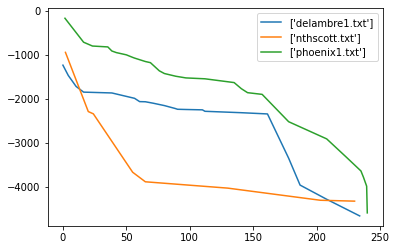

In [11]:
for i in selected:
    plt.plot(df_list[int(i)]['bottom_age'], df_list[int(i)]['bottom_depth']*-1, label=files[i+1])
    
    #plt.plot(df_list[i]['bottom_age'], df_list[i]['bottom_depth']*-1, label=files[i+1], c=c[i])
#plt.legend(loc='lower right',bbox_to_anchor=(0, -0.6), ncol=5)
plt.legend(loc='best', ncol=1)

# plt.title('NSW age models')
# plt.xlabel('Age (Ma)')
# plt.ylabel('Depth Below Sea Floor (m)')

In [12]:
#Looking at the two wells that have weird data

In [13]:
Bedout_1=pd.read_csv('/Users/smoron/Documents/1.Projects/Global_Sea_level/NWS/Bedout_1_WAPIMS.csv', sep=',')
eastmermaid1B=pd.read_csv('/Users/smoron/Documents/1.Projects/Global_Sea_level/NWS/eastmermaid1B_WAPIMS.csv', sep=',')


Bedout_1_EB=pd.read_table('/Users/smoron/Documents/1.Projects/Global_Sea_level/NWS/bedout1.txt',  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])
eastmermaid1B_EB=pd.read_table('/Users/smoron/Documents/1.Projects/Global_Sea_level/NWS/eastmermaid1B.txt',  comment='#', names=['bottom_age', 'bottom_depth', 'min_water_depth', 'max_water_depth', 'lithology'], delim_whitespace=True, usecols=[0,1,2,3, 4])

Text(0.5, 0, 'Age (Ma)')

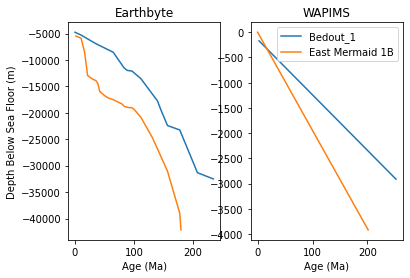

In [14]:
plt.subplot(121)
plt.plot(Bedout_1_EB['bottom_age'], Bedout_1_EB['bottom_depth']*-1, label='Bedout_1')
plt.plot(eastmermaid1B_EB['bottom_age'], eastmermaid1B_EB['bottom_depth']*-1, label='East Mermaid 1B')
plt.title('Earthbyte')
plt.xlabel('Age (Ma)')
plt.ylabel('Depth Below Sea Floor (m)')
plt.subplot(122)
plt.plot([2.6, 251.9], [min(Bedout_1['Top depth (m)'])*-1, max(Bedout_1['Top depth (m)'])*-1], label='Bedout_1')
plt.plot([0, 201.3], [min(eastmermaid1B['Top depth (m)'])*-1, max(eastmermaid1B['Top depth (m)'])*-1], label='East Mermaid 1B')
plt.legend(loc='best')
plt.title('WAPIMS')
plt.xlabel('Age (Ma)')
